In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
from scipy import stats
#import kuramoto as kmox
import plot as pltfn
from kuramoto1 import Kuramoto
import admin_functions as adfn
from sklearn import decomposition
sns.reset_orig()
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload


# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

In [2]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnraw, p20raw

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
  'PTZ-WILDTY

# Baseline vs Pre-seizure vs Seizure 
* we want traces that show clear separation of brain states (pre-ictal, ictal, post-ictal)
* if maximum of mean trace is >4x minimum of mean trace - then generalised events occur, pre and post-ictal periods


In [3]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnbin = sorted(glob.glob('*BLN*binarised.npy'))
p20bin = sorted(glob.glob('*PTZ20*binarised.npy'))
blnnnb = sorted(glob.glob('*BLN*nnb*'))
p20nnb = sorted(glob.glob('*PTZ20*nnb*'))
blnraw, p20raw
blnbin, p20bin

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.590binarised.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590b

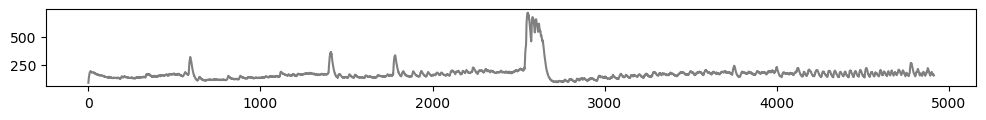

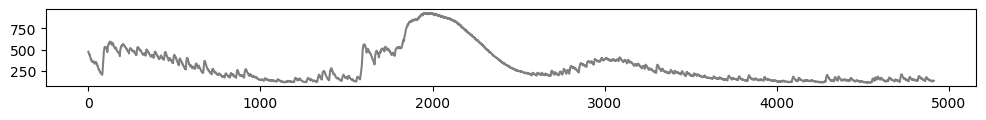

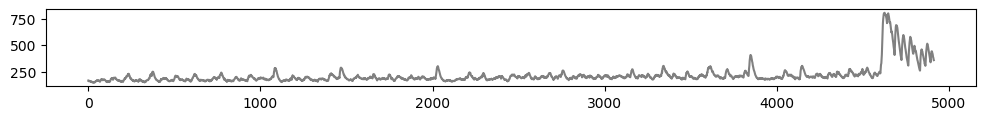

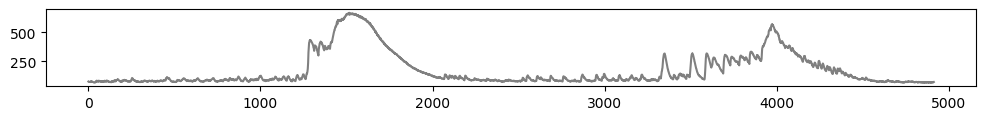

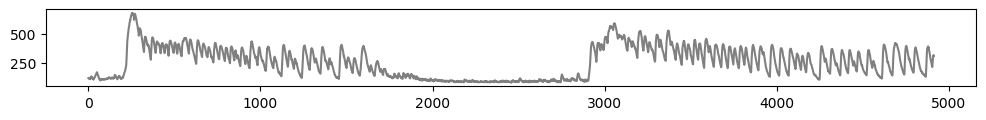

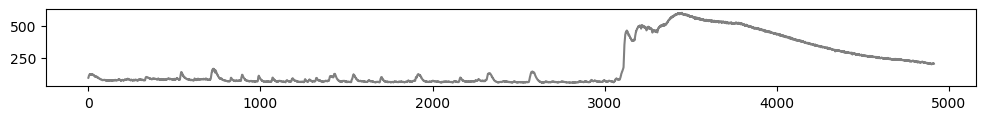

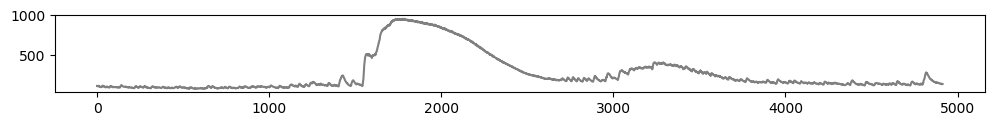

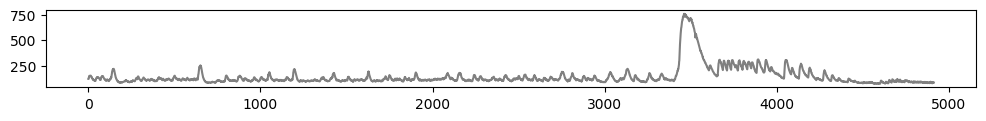

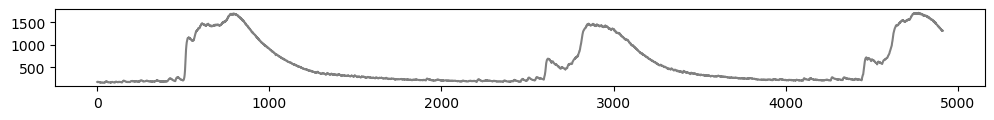

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'],
       dtype='<U66'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-07_2photon_se

In [4]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    if 4*mini < maxi:
        fig, ax = plt.subplots(figsize= (12,1))  
        plt.plot(mean, c='grey')
        gen_list = np.append(gen_list, p20raw[o])
        gen_blist = np.append(gen_blist, p20bin[o])
        gen_nnblist = np.append(gen_nnblist, p20nnb[o])
        sub_bln_list = np.append(sub_bln_list, blnraw[o])
        sub_bln_blist = np.append(sub_bln_blist, blnbin[o])
        sub_bln_nnblist = np.append(sub_bln_nnblist, blnnnb[o])
        sub_p5_list = np.append(sub_p5_list, p5raw[o])
        plt.show()
gen_list, gen_blist, gen_nnblist

* define generalised events - max amplitude increase in sliding window

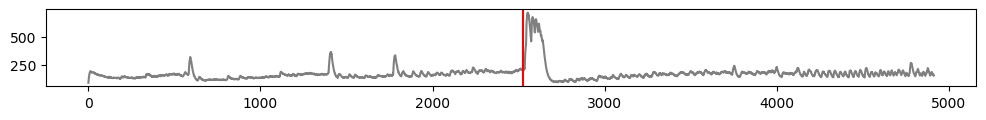

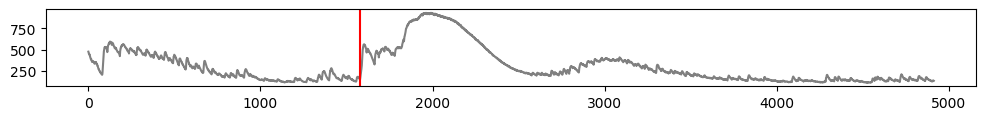

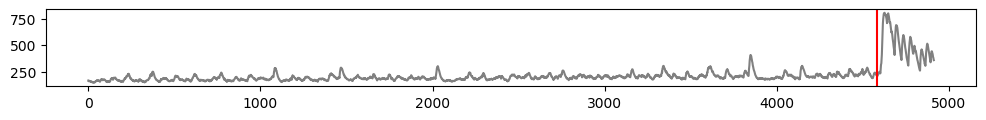

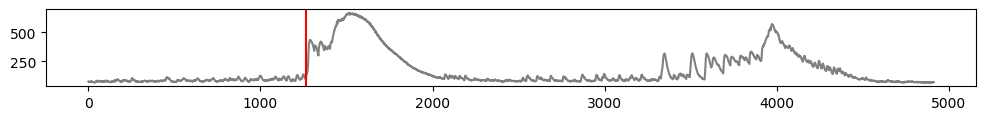

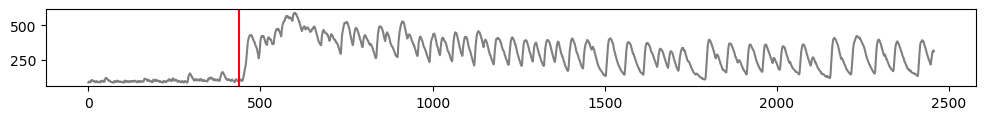

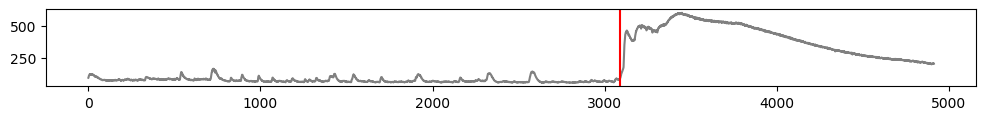

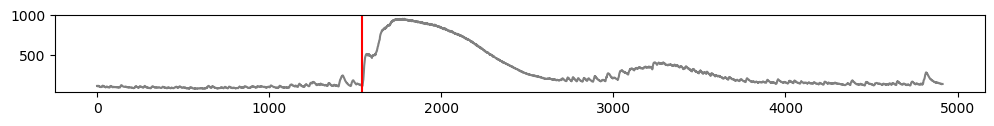

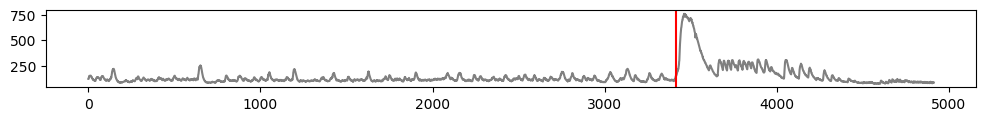

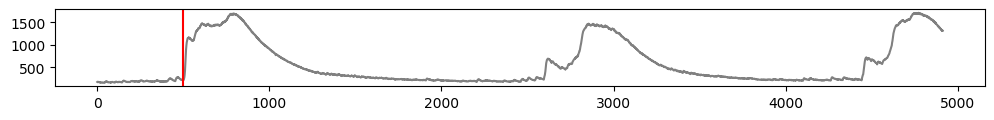

In [5]:
#IDENTIFY GENERALISED EVENT
max_list = list(range(len(gen_list)))
for o in range(len(gen_list)):
    p20 = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    if o == 4:
        mean = mean[np.int(mean.shape[0]/2):]
    window = adfn.window(30, mean.shape[0])[0]
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    
    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (12,1))  
    when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean, c = 'grey')
    for x in when: plt.axvline(x=x, c='red')
    max_list[o] = np.where(maxs ==  np.max(maxs))[0]
    plt.show()

In [6]:
#Time series for baseline, preictal, ictal analysis
import random
window = 400
bln_list, bln_blist = list(range(len(gen_list))),list(range(len(gen_list)))
pre_list, pre_blist = list(range(len(gen_list))),list(range(len(gen_list)))
p20_list, p20_blist = list(range(len(gen_list))),list(range(len(gen_list)))

for e in range(len(gen_list)):
    bln_ran = random.randint(0,4914-window)
    bln_list[e] = np.load(sub_bln_list[e])[:,bln_ran:bln_ran+window]
    bln_blist[e] = np.load(sub_bln_blist[e])[:,bln_ran:bln_ran+window]
    if e == 4:
        pre_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
    else:
        pre_list[e] = np.load(gen_list[e])[:,max_list[e][0]-window:max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]-window:max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,max_list[e][0]:max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]:max_list[e][0]+window]

In [ ]:
#Check time series
for i in range(len(bln_list)):
    fig, ax = plt.subplots(figsize= (12,1))  
    mean = np.apply_along_axis(np.mean, 0, bln_list[i])
    plt.plot(mean, c='grey')
    mean = np.apply_along_axis(np.mean, 0, pre_list[i])
    plt.plot(mean, c='orange')
    mean = np.apply_along_axis(np.mean, 0, p20_list[i])
    plt.plot(mean, c='red')
    plt.show()

In [8]:
#PCA VAR
bln_pcv, pre_pcv, p20_pcv = list(range(len(bln_list))),list(range(len(bln_list))),list(range(len(bln_list)))
for i in range(len(bln_list)):
    b_data,pre_data,p20_data = bln_list[i], pre_list[i], p20_list[i]
    b_components, pre_components, p20_components = b_data.shape[1], pre_data.shape[1], p20_data.shape[1]
    b_pca, pre_pca, p20_pca = decomposition.PCA(b_components) ,decomposition.PCA(pre_components), decomposition.PCA(p20_components) #Define decomposition
    b_fit, pre_fit, p20_fit = b_pca.fit(b_data) ,pre_pca.fit(pre_data),p20_pca.fit(p20_data) 
    bln_pcv[i], pre_pcv[i], p20_pcv[i] = b_fit.explained_variance_ratio_, pre_fit.explained_variance_ratio_, p20_fit.explained_variance_ratio_

In [ ]:
fig, axarr = plt.subplots(figsize = (5,5))
data = p20_pcv[0]
xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
yaxis = data
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = 'k')

m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
y_fit = np.exp(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
plt.plot(xaxis[:len(xaxis)-1], y_fit[:len(xaxis)-1])

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()
print(m,c)
from scipy import stats
stats.pearsonr(yaxis[1:], y_fit[1:])

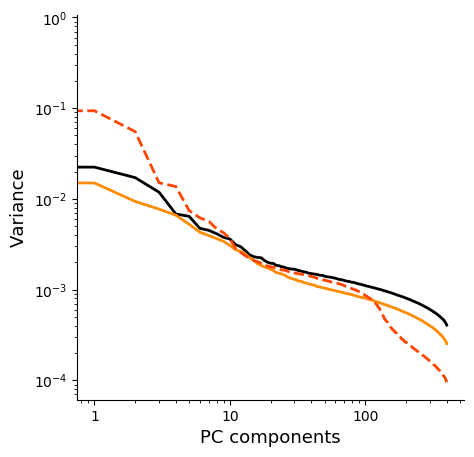

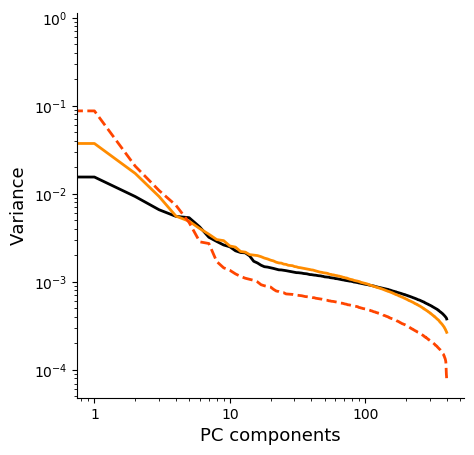

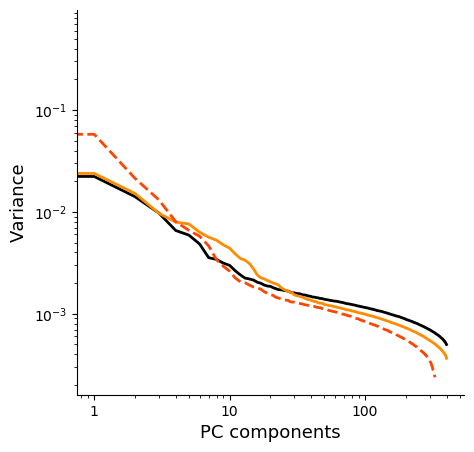

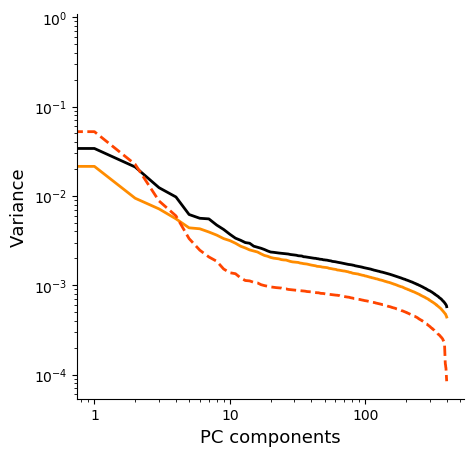

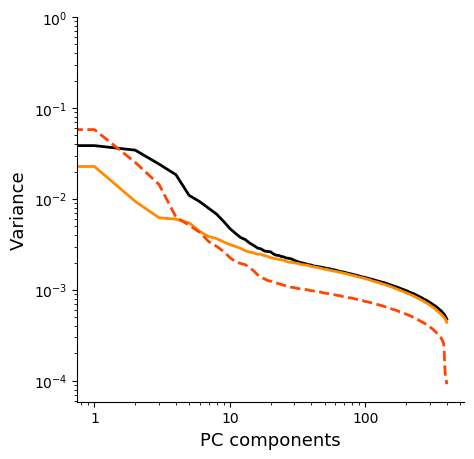

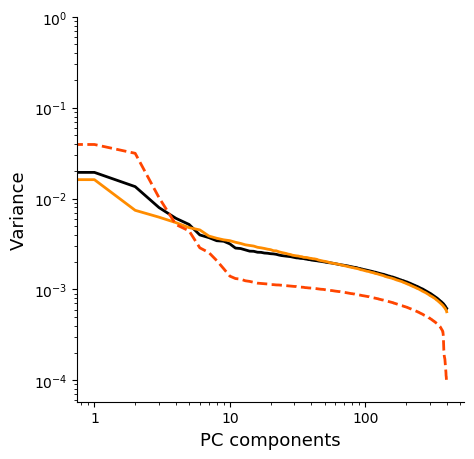

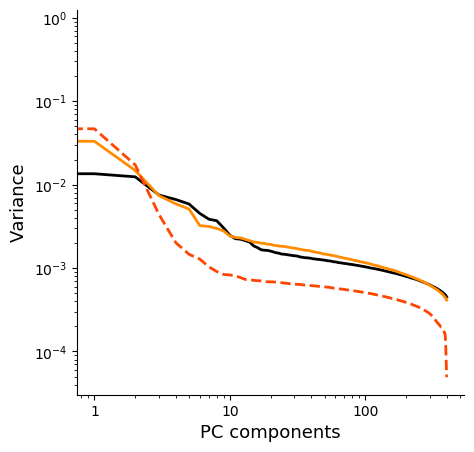

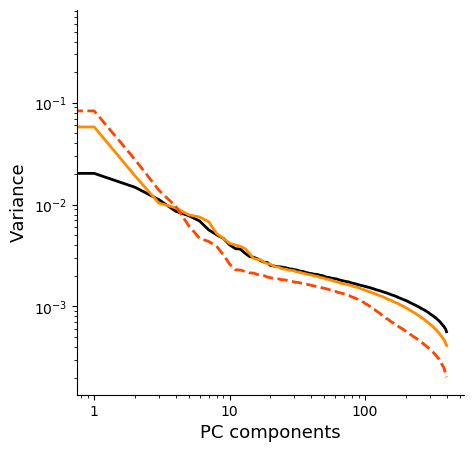

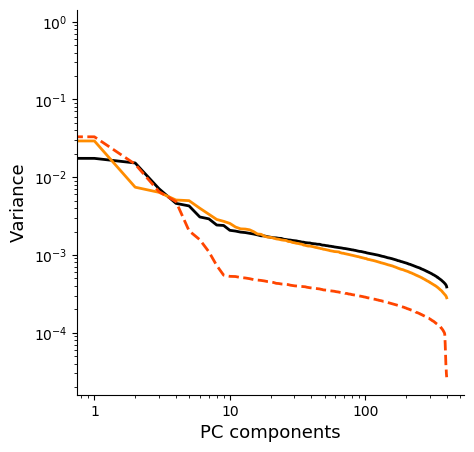

In [130]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
b_slope, pre_slope, p20_slope = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))
b_corr, pre_corr, p20_corr = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))

colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '--']
count=0
for i in range(len(bln_pcv)):
    plotlist = [bln_pcv,pre_pcv,p20_pcv]
    slopelist = [b_slope,pre_slope,p20_slope]
    corrlist = [b_corr, pre_corr, p20_corr]
    fig, axarr = plt.subplots(figsize = (5,5))
    for e in range(len(plotlist)):
        data = plotlist[e][i]
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
        y_fit = np.exp(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
        corrlist[e][count] = stats.pearsonr(yaxis[1:], y_fit[1:])[0]
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC components', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

In [11]:
#EXPONENT
import pandas as pd

exp = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

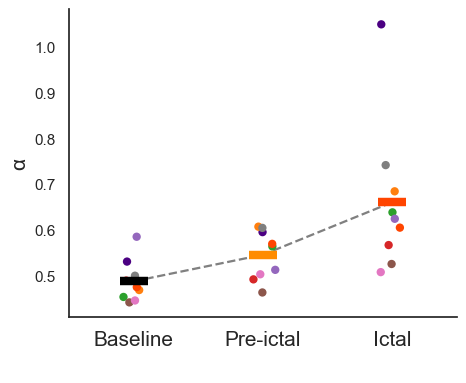

In [12]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (5,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'Pre-ictal', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [14]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'Pre-ictal', 'Ictal'], mode='single')

[[-4.442757099009723,
  0.002160006794232517,
  0.025,
  'Significant',
  'Baseline - Pre-ictal'],
 [-4.2184740878890885,
  0.002921895899053789,
  0.025,
  'Significant',
  'Baseline - Ictal']]

In [131]:
#POWER LAW CORRELATION
import pandas as pd

corr = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

corrdf = pd.DataFrame({"r":np.append(corrlist[0],np.append(corrlist[1], corrlist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

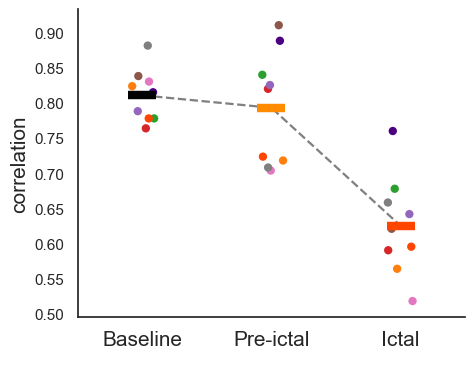

In [135]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (5,4))
ax = sns.pointplot(x="Labels", y="r", data = corrdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="r", data = corrdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="r", data = corrdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('correlation', size = '15')
ax.set_xticklabels(['Baseline', 'Pre-ictal', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [137]:
adfn.ttest(corrdf, 'Labels', 'r', ['Baseline', 'Pre-ictal', 'Ictal'], mode='single')

[[0.5428892622780149,
  0.6019990528624599,
  0.025,
  'Not significant',
  'Baseline - Pre-ictal'],
 [7.041597375804134,
  0.00010806760607405257,
  0.025,
  'Significant',
  'Baseline - Ictal']]

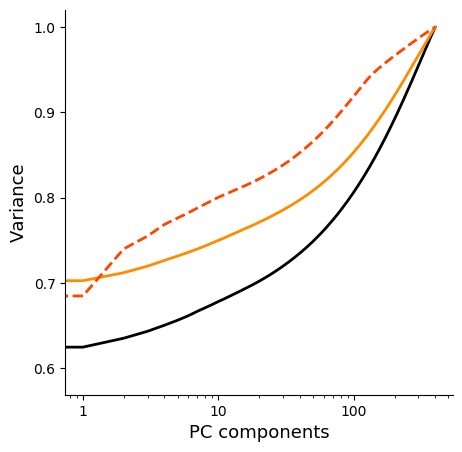

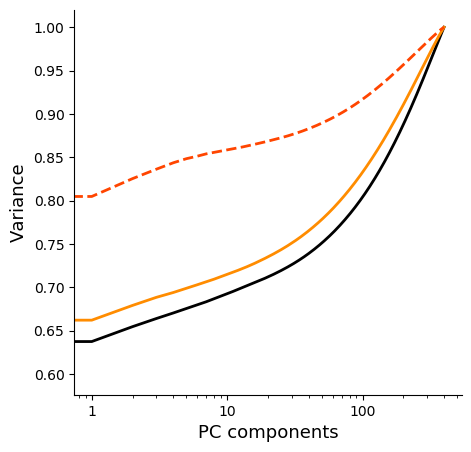

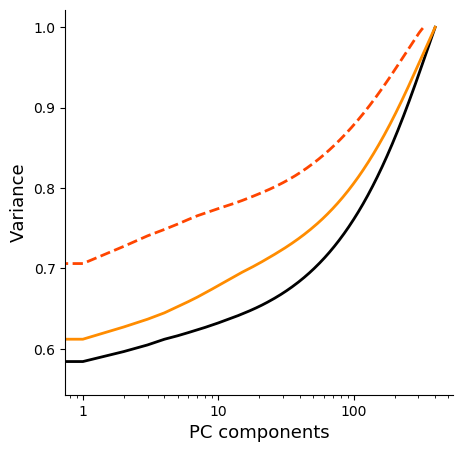

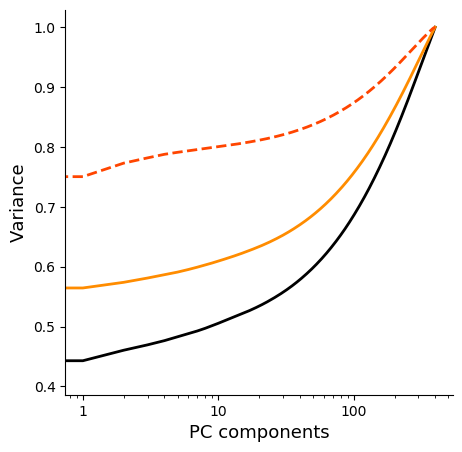

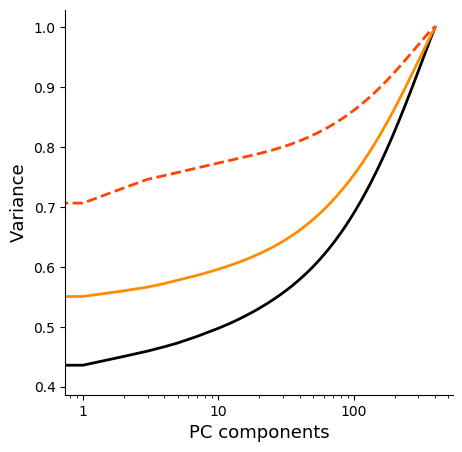

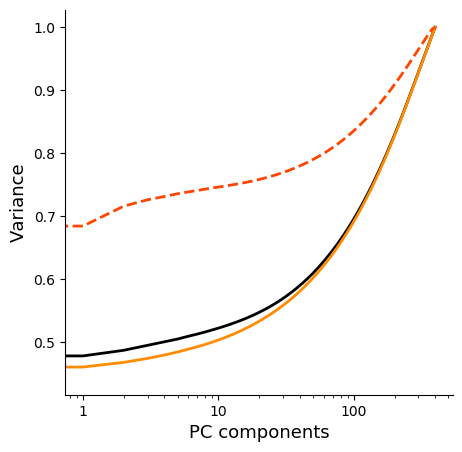

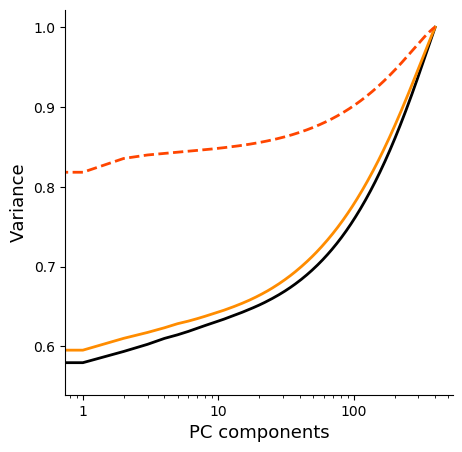

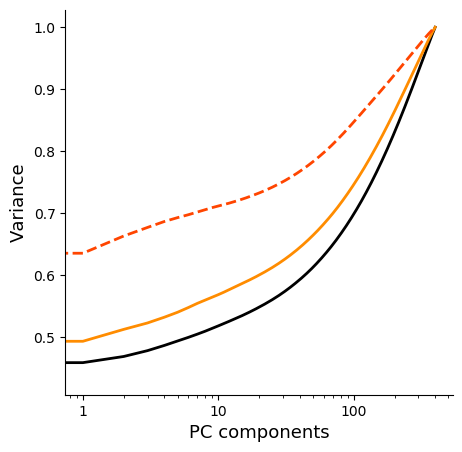

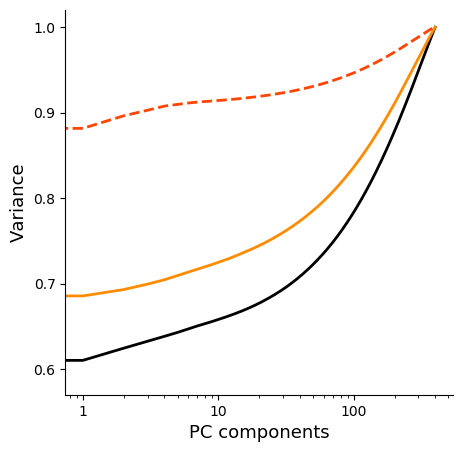

In [162]:
import matplotlib
import powerlaw
sns.reset_orig()

def cumulative(input_vec):
    count = 0
    output_vec = np.zeros(input_vec.shape)
    for i in range(len(input_vec)):
        count = count + input_vec[i]
        output_vec[i] = count
    return(output_vec)

colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '--']
count=0
for i in range(len(bln_pcv)):
    plotlist = [bln_pcv,pre_pcv,p20_pcv]
    slopelist = [b_slope,pre_slope,p20_slope]
    slope2list = [b2_slope,pre2_slope,p202_slope]
    fig, axarr = plt.subplots(figsize = (5,5))
    for e in range(len(plotlist)):
        data = plotlist[e][i]
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = cumulative(data)
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
    count+=1
    axarr.set_xscale('log')
    #axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC components', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

# State transition - manifold smoothness
* Show dynamic reorganisation of population responses throughout seizure block - different state transitions
* suggests changes to dimensionality/connectivity throughout entire period

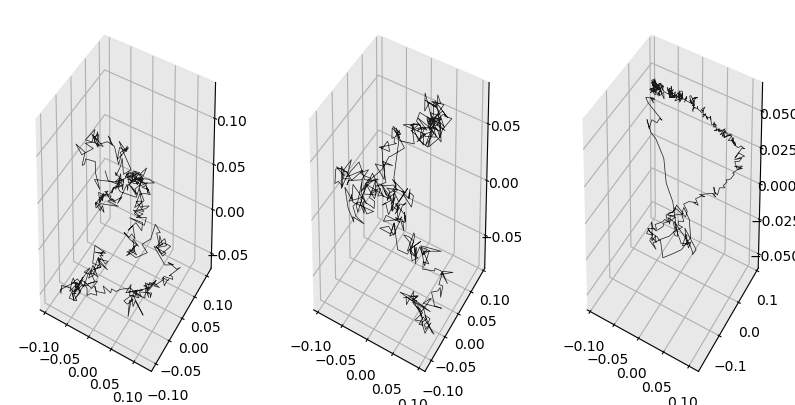

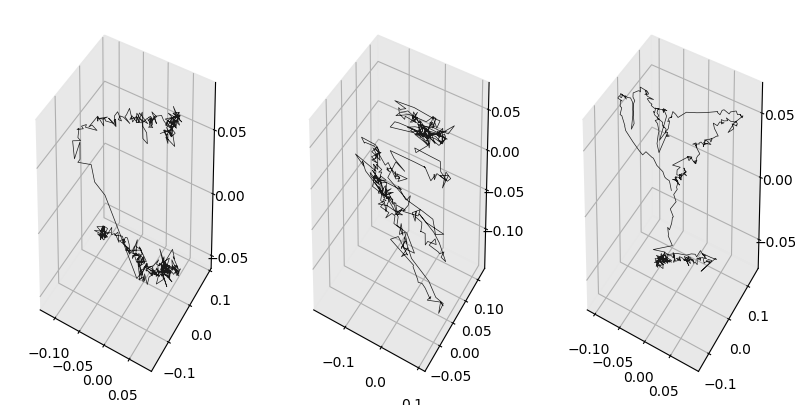

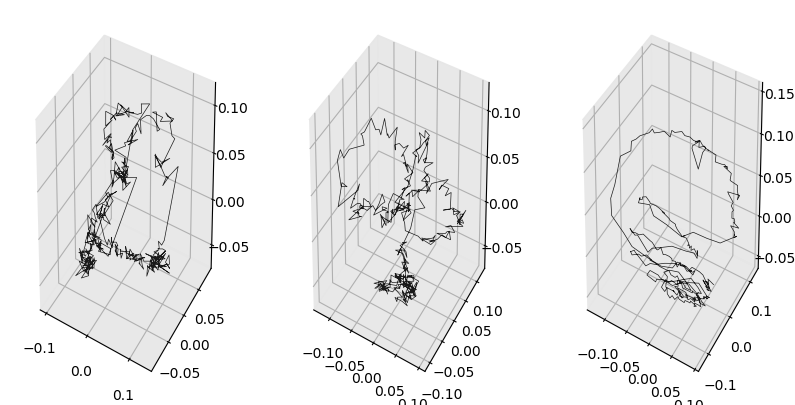

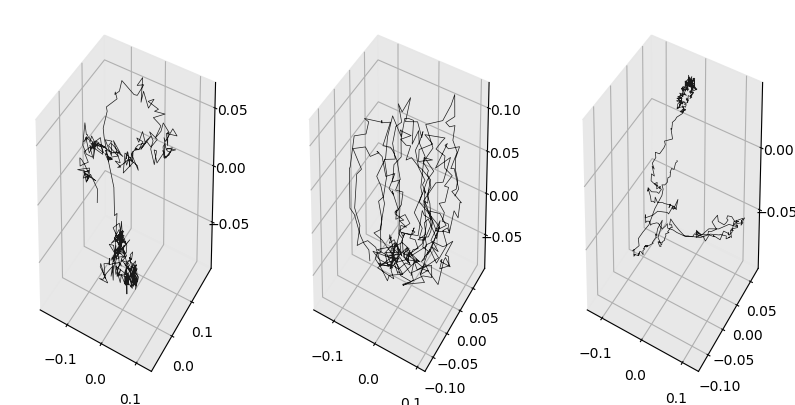

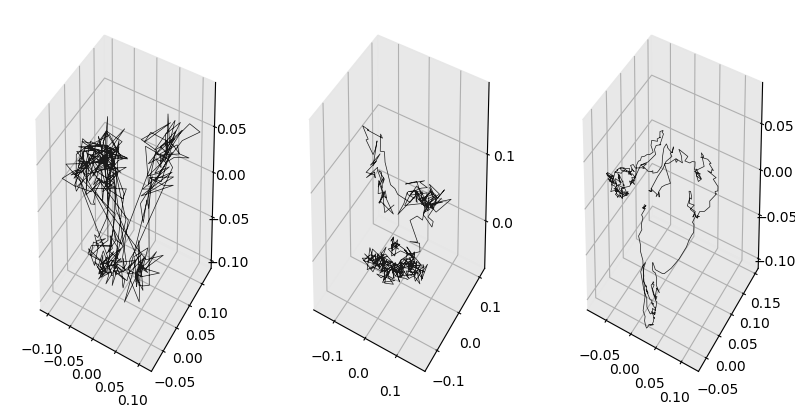

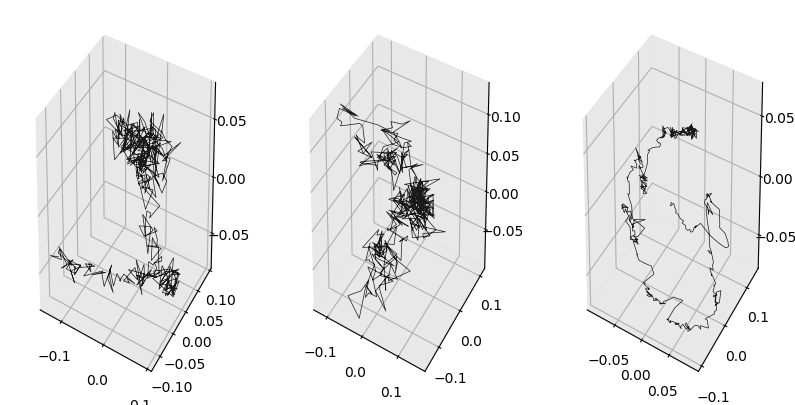

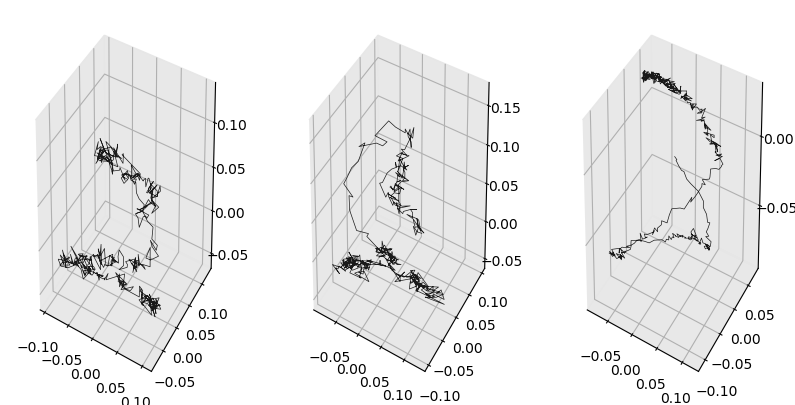

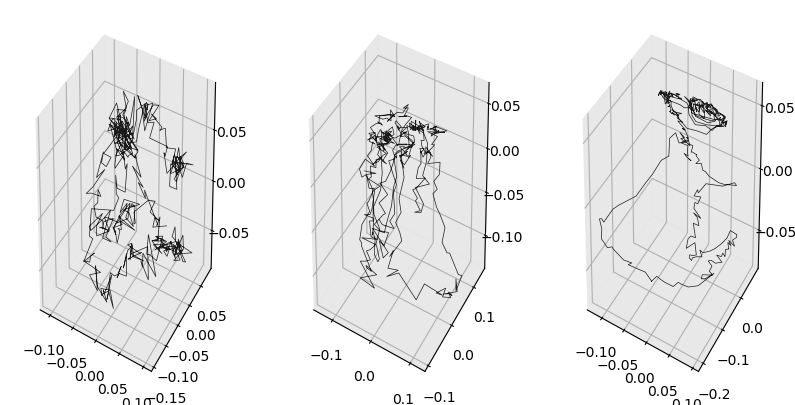

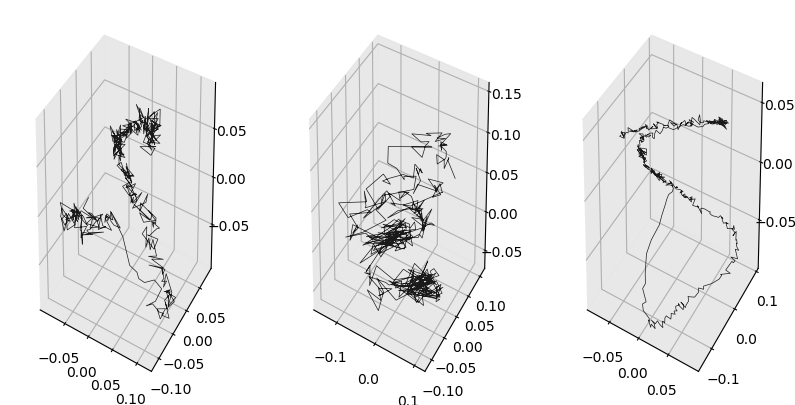

In [119]:
#MANIFOLD SMOOTHNESS - state transition

for i in range(len(bln_list)):

    #Manifold smoothness
    #---------------------------------
    n_components = 4
    b_data = bln_list[i]
    pre_data = pre_list[i]
    p20_data = p20_list[i]
    #NON-NEGATIVE MATRIX FACTORISATION
    from sklearn import decomposition
    pca = decomposition.PCA(n_components)
    fit = pca.fit(b_data) 
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (10,5))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

    pca = decomposition.PCA(n_components)
    fit = pca.fit(pre_data) 
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

    pca = decomposition.PCA(n_components)
    fit = pca.fit(p20_data) 
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    
    plt.show()

In [120]:
sub_bln_list , sub_p5_list, gen_list

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
       dtype='<U64'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_

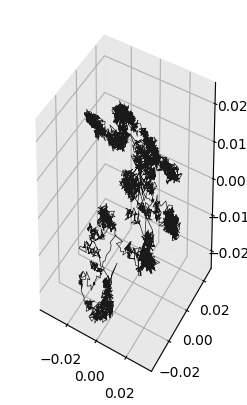

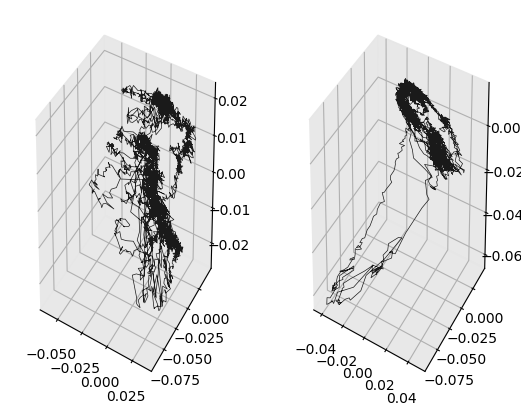

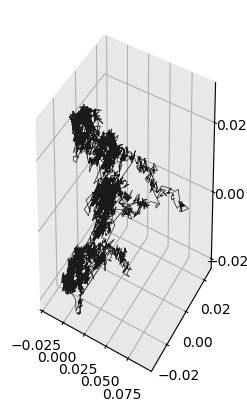

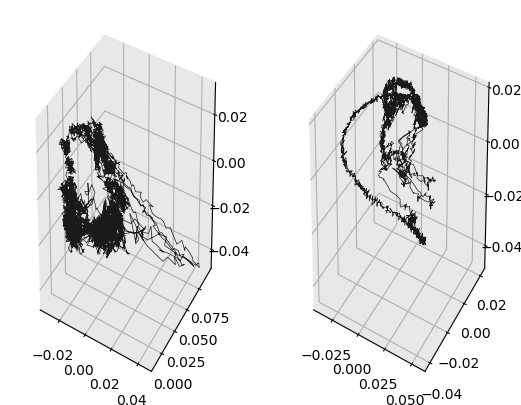

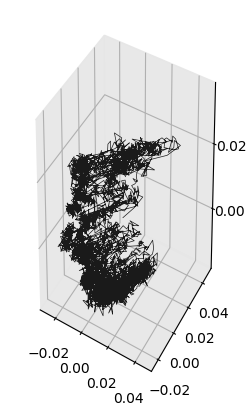

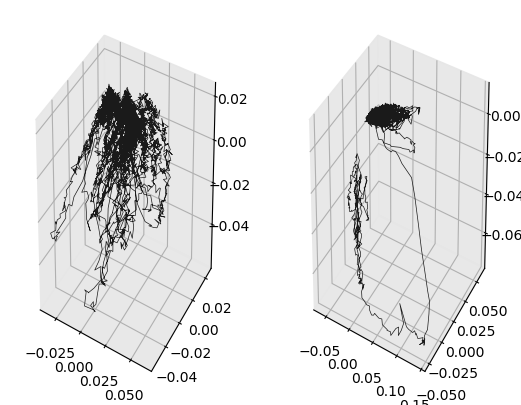

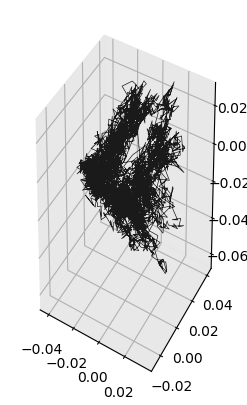

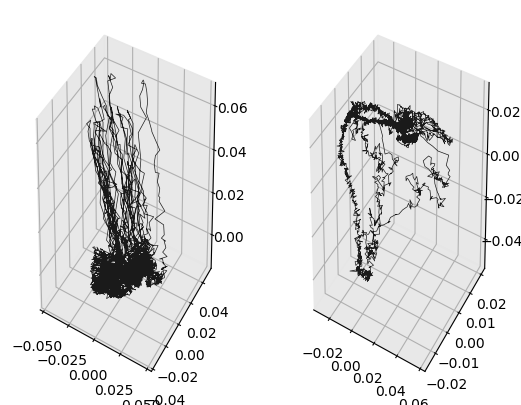

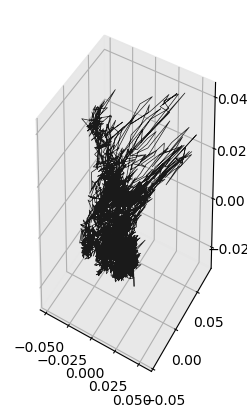

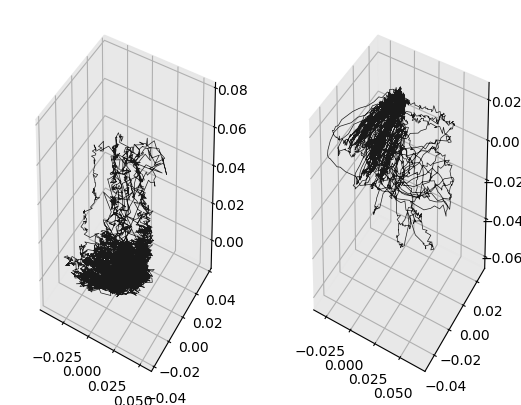

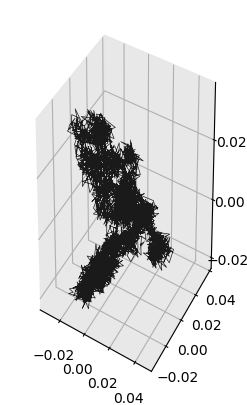

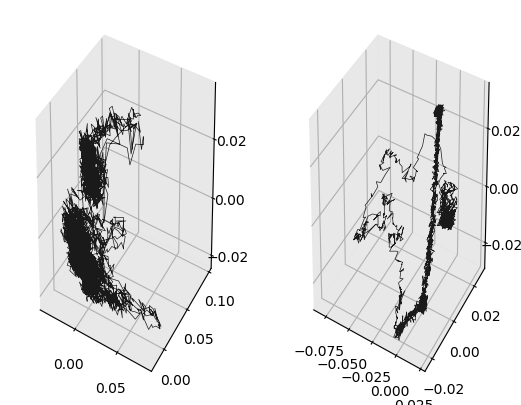

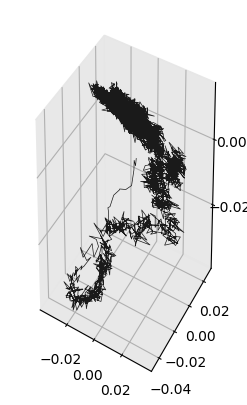

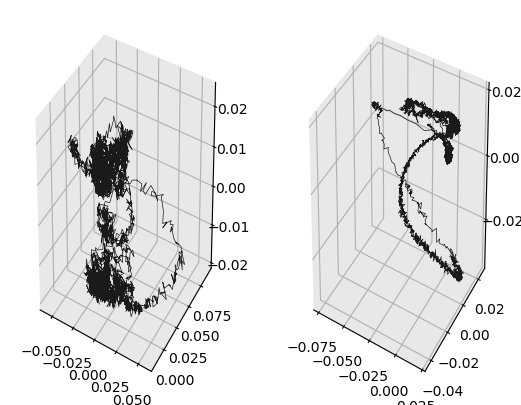

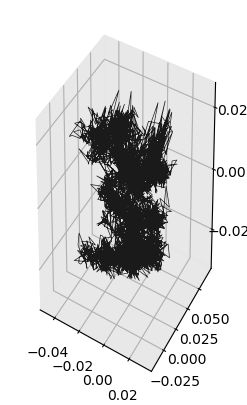

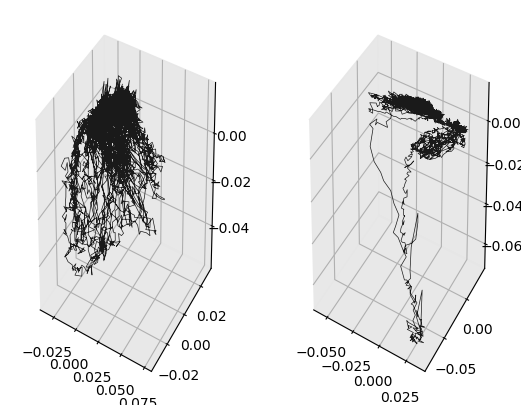

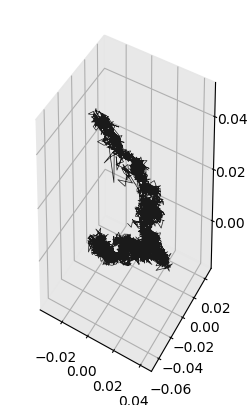

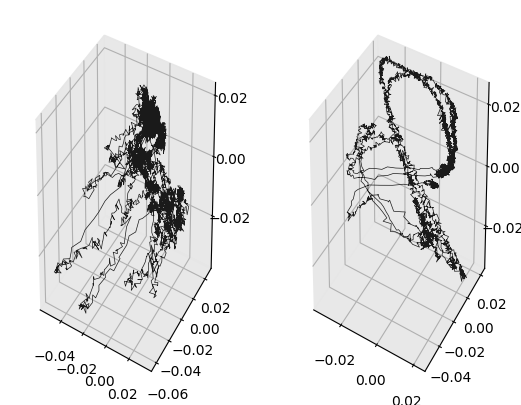

In [121]:
for i in range(len(gen_list)):

    #Manifold smoothness - entire block
    #---------------------------------
    n_components = 4
    bln = np.load(sub_bln_list[i])
    p5 = np.load(sub_p5_list[i])
    p20 = np.load(gen_list[i])

    
    from sklearn import decomposition
    pca = decomposition.PCA(n_components)
    fit = pca.fit(bln) 
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (10,5))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    
    pca = decomposition.PCA(n_components)
    fit = pca.fit(p5) 
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (10,5))
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

    pca = decomposition.PCA(n_components)
    fit = pca.fit(p20) 
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], 'k', linewidth = 0.5)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))

    plt.show()

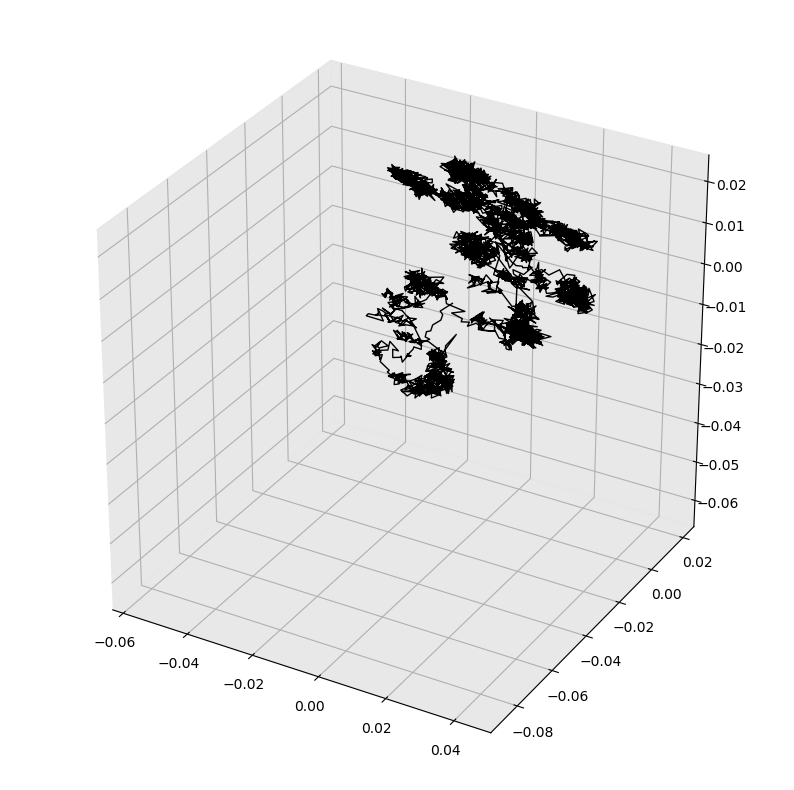

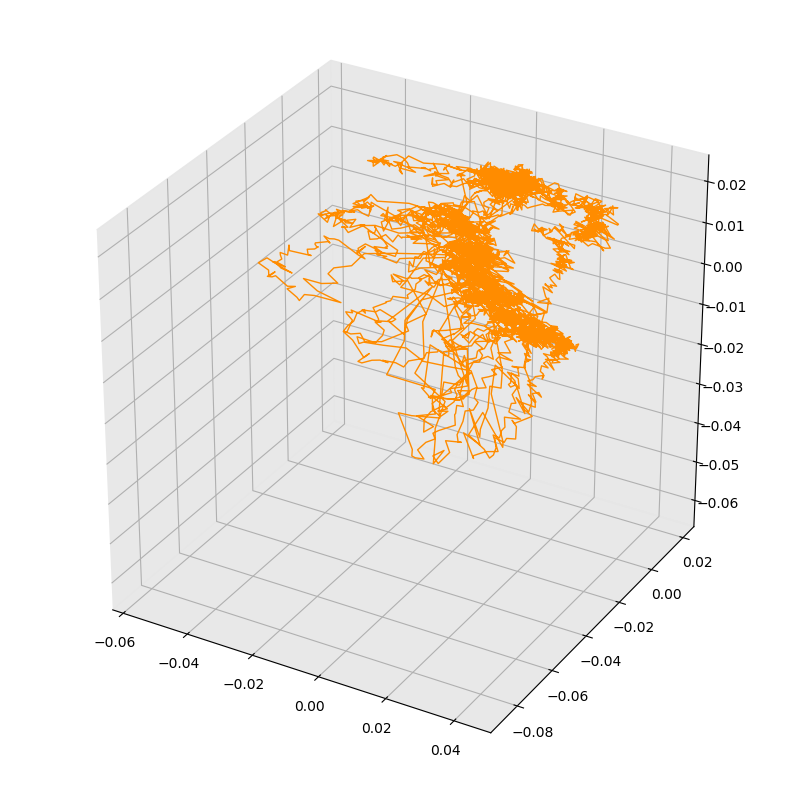

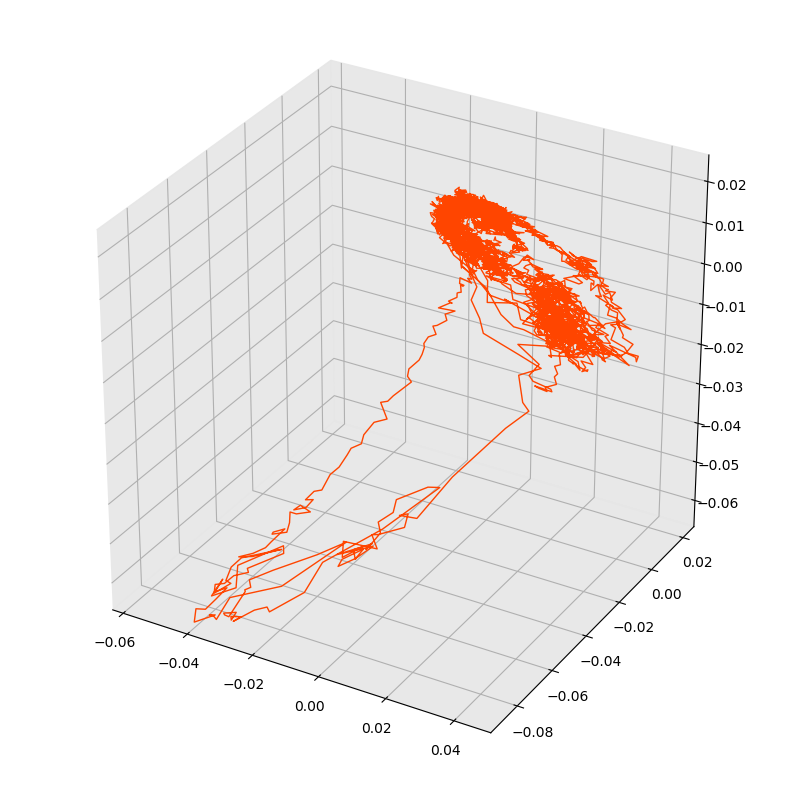

In [144]:
colors = ['black', 'darkorange','orangered']
i, n_components = 0, 4
bln = np.load(sub_bln_list[i])
p5 = np.load(sub_p5_list[i])
p20 = np.load(gen_list[i])
plotlist = bln, p5, p20
x,y,z, = [],[],[]

for i in range(len(plotlist)):
    pca = decomposition.PCA(n_components)
    fit = pca.fit(plotlist[i]) 
    x = np.append(fit.components_[3,:], x)
    y = np.append(fit.components_[2,:], y)
    z = np.append(fit.components_[1,:], z)
xmax, xmin = np.max(x), np.min(x)
ymax, ymin = np.max(y), np.min(y)
zmax, zmin = np.max(z), np.min(z)

for i in range(len(plotlist)):
    pca = decomposition.PCA(n_components)
    fit = pca.fit(plotlist[i])
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (10,10))
    ax = fig.add_subplot(projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], colors[i], linewidth = 1)
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.set_zlim(zmin, zmax)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    #plt.zlim(zmin, zmax)
    plt.show()

# State space model
* n = 1000 cells
* 1 dimensional coding scheme
* stimulus = single circular variable - direction of a grating
* visualise = random projection into 3d space
* 

# Sliding window 

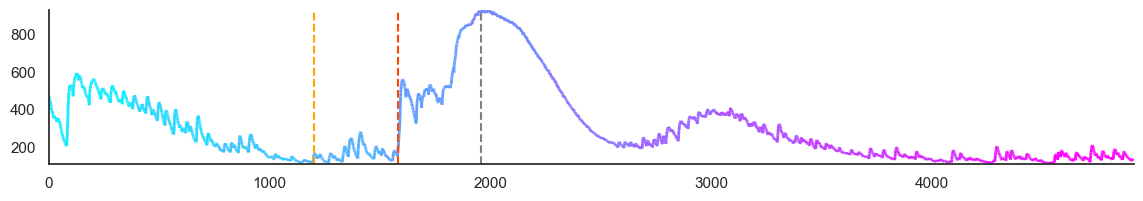

In [17]:
#CHOOSE FISH
choose = 1
data = np.load(gen_list[choose])
mean = np.apply_along_axis(np.mean, 0, data)
window = adfn.window(370, mean.shape[0])[0]
data_list = list(range((np.int(mean.shape[0]/window))))
    
#PLOT MEAN DIST BY SEGMENTS
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

y = mean
x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
z = np.zeros(mean.shape[0])
count=0
for i in range(len(data_list)):
    z[count:count+window] = i+1
    count+=window

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
fig, ax = plt.subplots(figsize= (14,2))
lc = LineCollection(segments, cmap=plt.get_cmap('cool'), norm=plt.Normalize(0, len(data_list)))
lc.set_array(z)
lc.set_linewidth(2)
plt.gca().add_collection(lc)

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())


for x in max_list[choose]: plt.axvline(x=x, c='orangered', linewidth = 1.5, linestyle= '--')
for x in max_list[choose]: plt.axvline(x=x+window, c='grey', linewidth = 1.5, linestyle= '--')
for x in max_list[choose]: plt.axvline(x=x-window, c='orange', linewidth = 1.5, linestyle= '--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


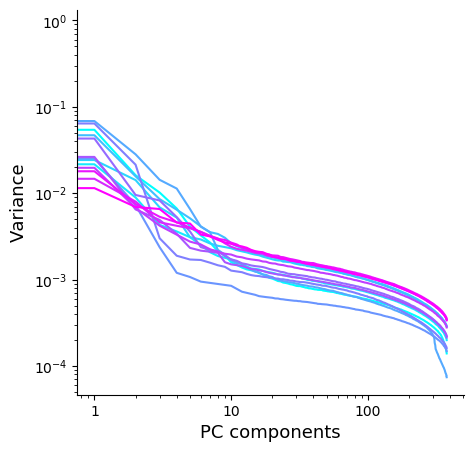

In [10]:
#CHOOSE FISH
choose = 1
data = np.load(gen_list[choose])
mean = np.apply_along_axis(np.mean, 0, data)
window = adfn.window(370, mean.shape[0])[0]

#CALCULATE EIGENSPECTRUM FOR SEGMENTS
count,count1=0,0
data_list = list(range((np.int(mean.shape[0]/window))))
for e in range(np.int(mean.shape[0]/window)):
    sub_data = data[:,count:count+window]
    n_components = sub_data.shape[1]
    pca = decomposition.PCA(n_components)
    fit = pca.fit(sub_data)
    data_list[count1] = fit.explained_variance_ratio_

    count+=window
    count1+=1
 
#PLOT EIGENSPECTRUM
import matplotlib
import sys
from scipy import stats
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,len(data_list))))
fig, axarr = plt.subplots(figsize = (5,5))
for i in range(len(data_list)):
    xaxis = np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1)
    yaxis = data_list[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 2, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

plt.show()


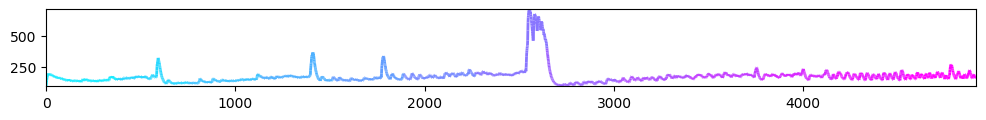

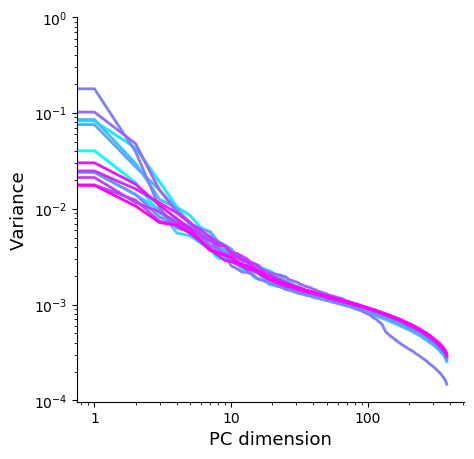

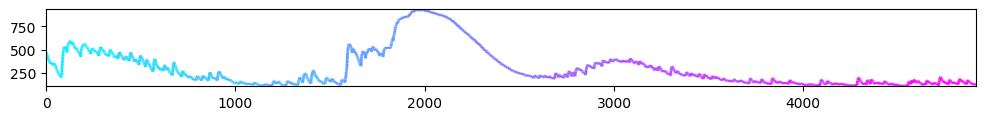

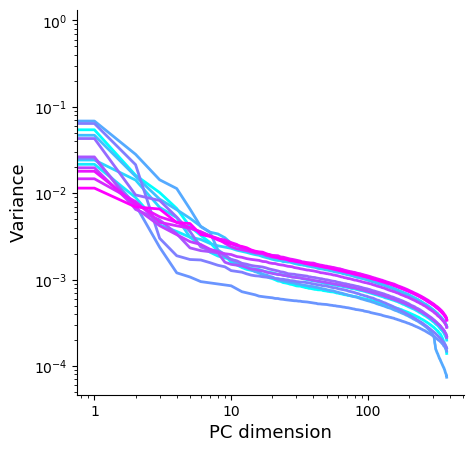

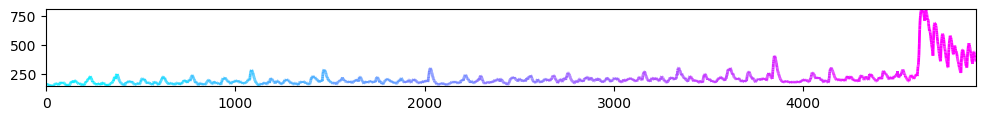

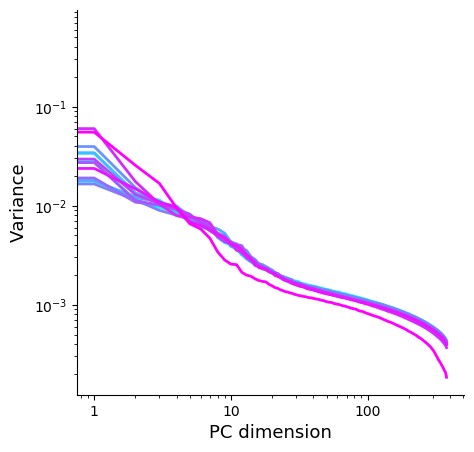

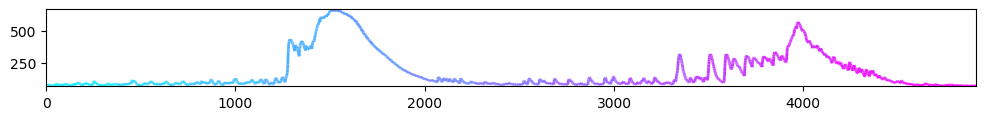

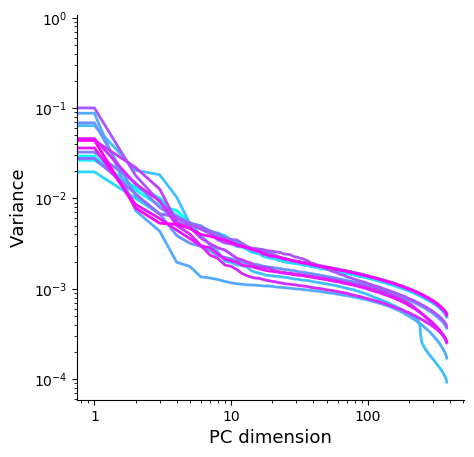

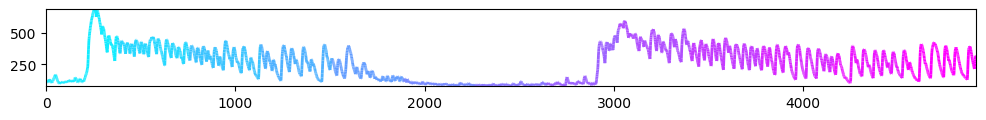

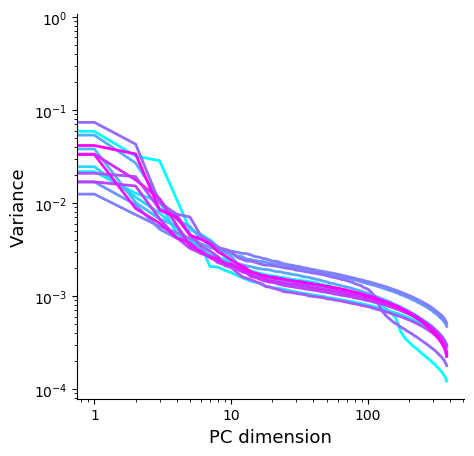

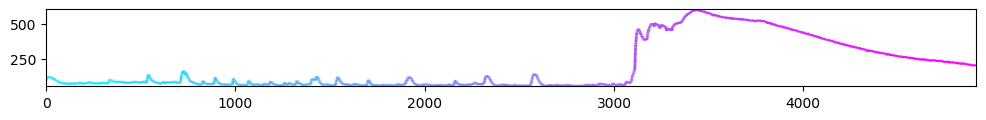

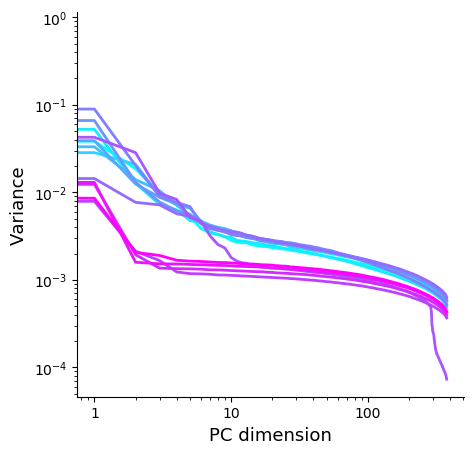

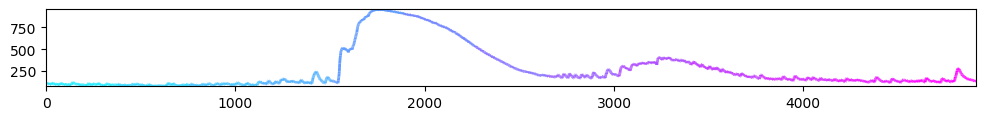

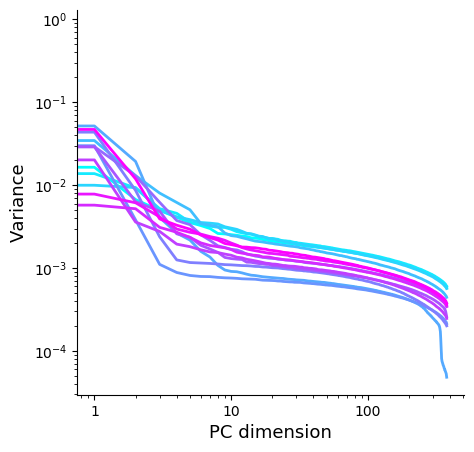

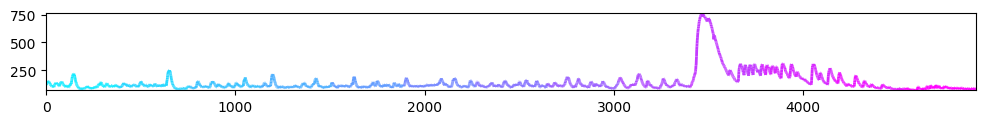

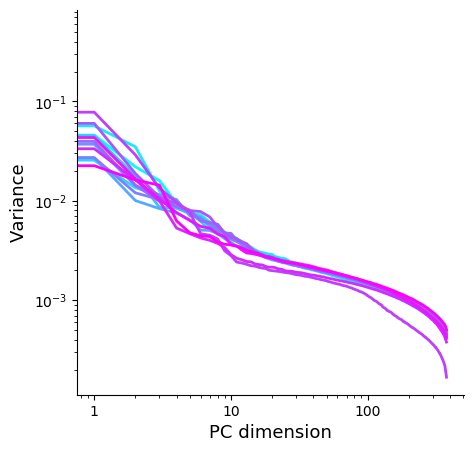

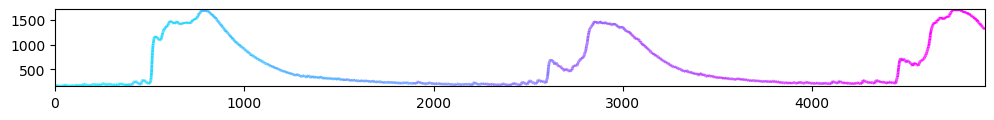

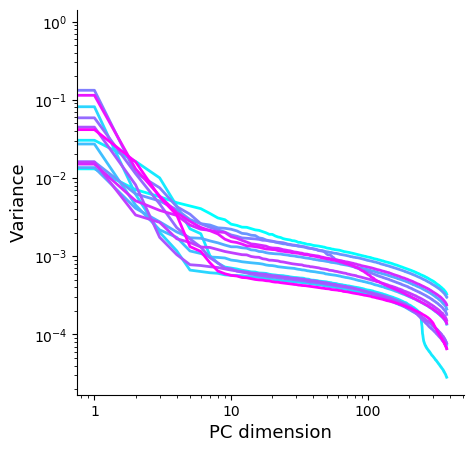

In [37]:
for o in range(len(gen_list)):
    choose = o
    data = np.load(gen_list[choose])
    mean = np.apply_along_axis(np.mean, 0, data)
    window = adfn.window(370, mean.shape[0])[0]
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))

    #PLOT MEAN DIST BY SEGMENTS
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    from matplotlib.colors import ListedColormap, BoundaryNorm

    y = mean
    x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
    z = np.zeros(mean.shape[0])
    count=0
    for i in range(len(data_list)):
        z[count:count+window] = i+1
        count+=window


    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be numlines x points per line x 2 (x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    fig, ax = plt.subplots(figsize= (12,1))
    lc = LineCollection(segments, cmap=plt.get_cmap('cool'), norm=plt.Normalize(0, len(data_list)))
    lc.set_array(z)
    lc.set_linewidth(2)
    plt.gca().add_collection(lc)

    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.show()

    #EIGENSPECTRUM
    import matplotlib
    import sys
    from scipy import stats
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))
    for e in range(np.int(mean.shape[0]/window)):
        sub_data = data[:,count:count+window]
        n_components = sub_data.shape[1]
        pca = decomposition.PCA(n_components)
        fit = pca.fit(sub_data)
        data_list[count1] = fit.explained_variance_ratio_

        count+=window
        count1+=1
    
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,len(data_list))))
    fig, axarr = plt.subplots(figsize = (5,5))
    for i in range(len(data_list)):
        xaxis = np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1)
        yaxis = data_list[i]
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 0.5, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC dimension', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()
